# Critical Difference Plot on Surrogate Performance

Produces an image similar to:

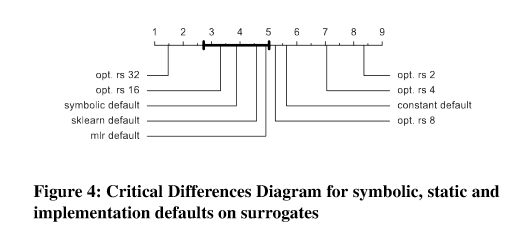

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)

In [2]:
import Orange

Original code:

In [ ]:
# Need to find out how to annotate those CD diagrams
aggsrdf2 = aggsrdf[~aggsrdf.search.isin(filter_search+["mupluslambda"])].copy()
aggsrdf2["out_rank"] = aggsrdf2.groupby(["task", "problem"]).out.rank(ascending=False)
aggsrdf2 = aggsrdf2.sort_values(["task", "problem"])
aggdf2 = aggsrdf2.groupby(["problem", "search"])["out_rank"].mean().reset_index()

for problem in aggdf2.problem.unique():
    data = aggdf2[aggdf2.problem == problem]
    if len(data):
        # Friedman Test: 
        cnts = aggsrdf2[aggsrdf2.problem == problem].groupby(["task"]).search.count()
        drop = cnts[cnts != cnts.max()].index.values
        ftestdata = aggsrdf2[(aggsrdf2.problem == problem) & (~aggsrdf2.task.isin(drop))]
        xar = [[x.values] for name, x in ftestdata.groupby(["search"])["out"]]
        tst = scipy.stats.friedmanchisquare(*xar)
        print(f"{problem} : {tst}")
        # Nemeny Test
        n_tasks = len(aggsrdf[aggsrdf.problem == problem].task.unique())
        print(f"{n_tasks}")
        names = data["search"].values
        avg_ranks = data["out_rank"].values
        cd = Orange.evaluation.compute_CD(avg_ranks, n_tasks)
        if tst[1] > 0.05:
            cd=None
        #import pdb; pdb.set_trace()
        cdm = [i for i,v in enumerate(names) if v == "symbolic default"]
        Orange.evaluation.graph_ranks(avg_ranks, names, cdmethod = cdm[0],cd=cd, width=6, textspace=1.5)
        # plt.title(problem)
        plt.savefig(f"figures/cd_surrogates_{problem}.pdf", bbox_inches='tight', pad_inches=.1)
        plt.show()